# Cardiovascular Disease Prediction

**Project Goal:** To clean and analyze a large-scale cardiovascular disease dataset to identify key risk factors and build a machine learning model to predict the presence of cardiovascular disease in a patient.

**Dataset Source:** [Kaggle Cardiovascular Disease Dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)


In [142]:
!pip install xgboost

# Importing Libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing Dataset

In [148]:
df = pd.read_csv('cardio_train.csv', sep=';')

#  Dataset Overview


In [151]:
print("First 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nDescriptive Statistics:")
display(df.describe())

First 5 rows:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB

Descriptive Statistics:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Initial Observations:
* The dataset contains **70,000 rows**.
* The `age` column is in **days**, not years.
* The descriptive statistics for `ap_hi` (systolic blood pressure) and `ap_lo` (diastolic blood pressure) show some suspicious minimum and maximum values that are physiologically impossible. This confirms that cleaning is necessary.
* The `id` column is present, but as it's just a unique identifier, it likely has no predictive value.
* BMI is a universally recognized indicator of health and is a very powerful predictive feature that we can create from the existing `height` and `weight` columns.

# Data Cleaning & Preprocessing

In [155]:
# dropping 'id' column
df = df.drop('id', axis=1)

# Remove rows where diastolic pressure is higher than systolic
df = df[df['ap_lo'] <= df['ap_hi']]

# Remove rows with absurdly high or low blood pressure readings

df = df[(df['ap_hi'] >= df['ap_hi'].quantile(0.025)) & (df['ap_hi'] <= df['ap_hi'].quantile(0.975))]
df = df[(df['ap_lo'] >= df['ap_lo'].quantile(0.025)) & (df['ap_lo'] <= df['ap_lo'].quantile(0.975))]

# Handling Duplicates
print(f"Number of duplicate rows before dropping: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

# Convert Age from Days to Years
df['age_years'] = (df['age'] / 365.25).astype(int)

# Create Body Mass Index (BMI)
# Height is in cm, so we convert to meters for the BMI formula
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Drop the original columns that are now redundant
df = df.drop(['age', 'height', 'weight'], axis=1)
print(f"Dataset shape after cleaning: {df.shape}")

Number of duplicate rows before dropping: 24
Dataset shape after cleaning: (65548, 11)


# Exploratory Data Analysis (EDA)


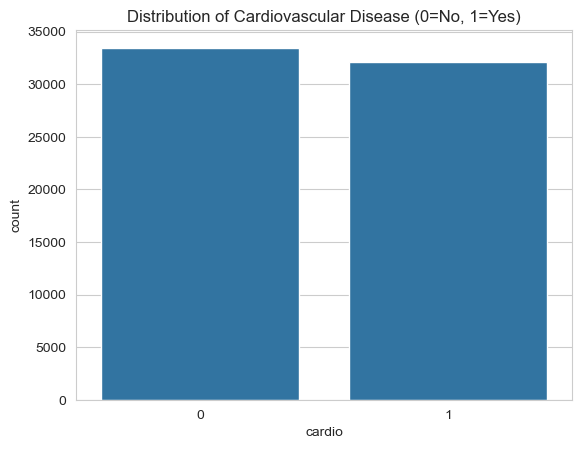

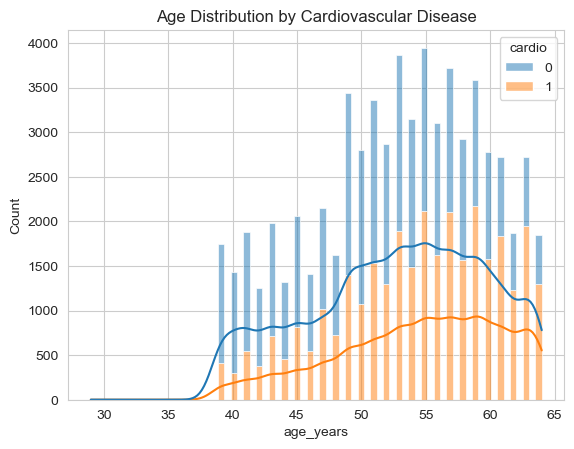

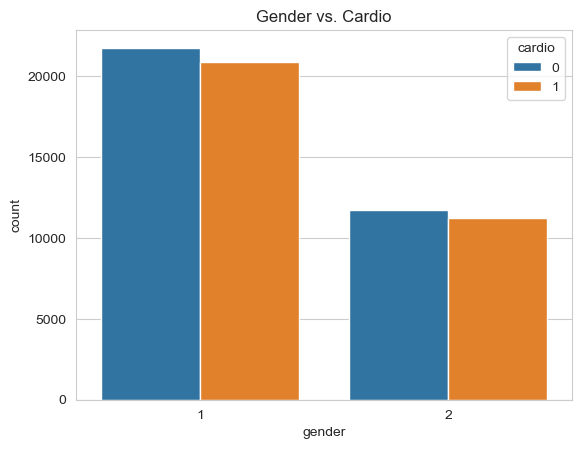

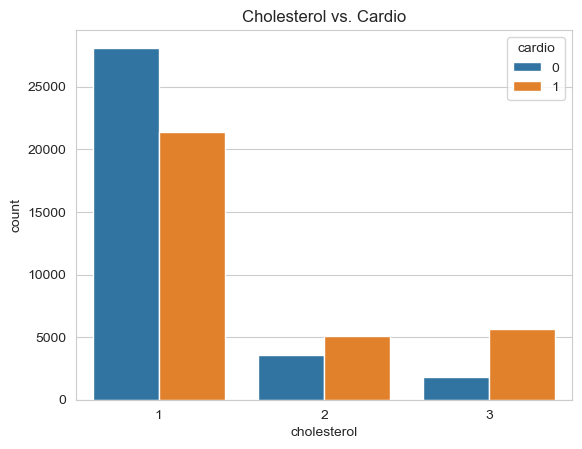

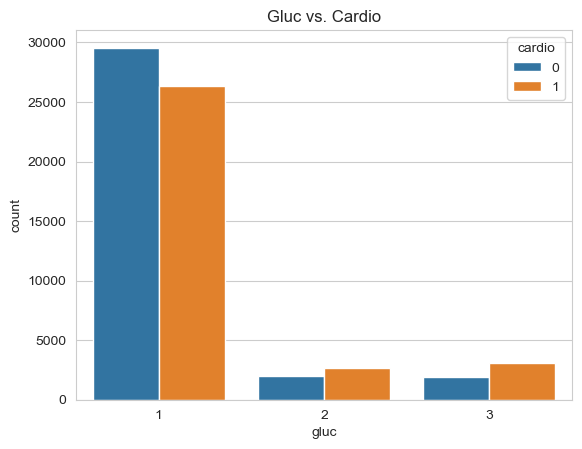

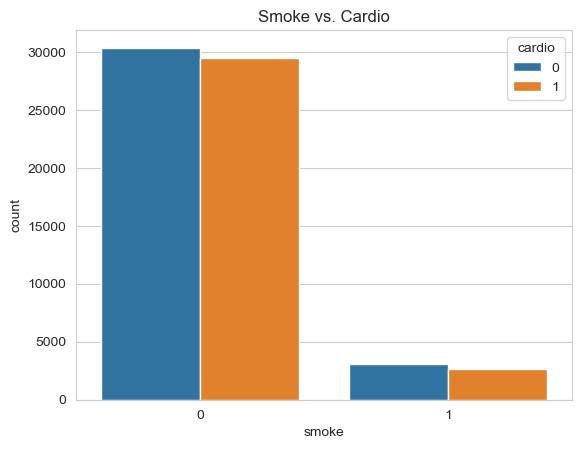

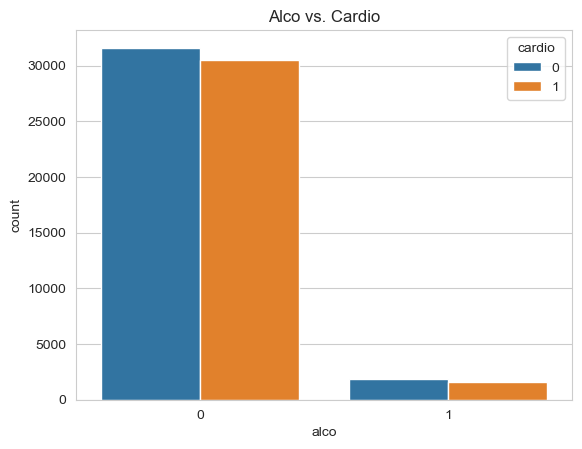

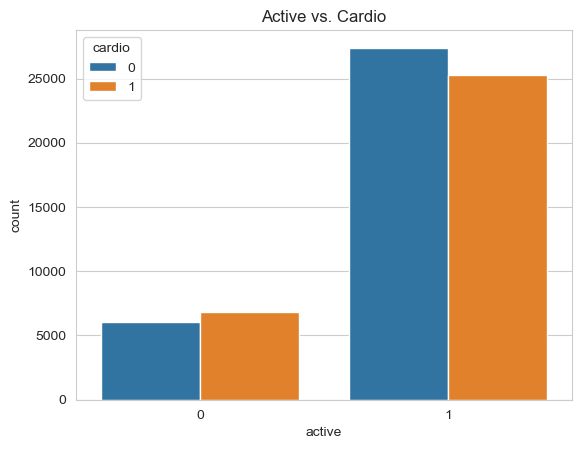

In [158]:
# --- Target Variable Distribution ---
sns.countplot(x='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease (0=No, 1=Yes)')
plt.show()

# --- Age Distribution by Cardio Outcome ---
sns.histplot(data=df, x='age_years', hue='cardio', kde=True, multiple='stack')
plt.title('Age Distribution by Cardiovascular Disease')
plt.show()

# --- Analyzing Categorical Features vs. Target ---
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
for feature in categorical_features:
    sns.countplot(x=feature, hue='cardio', data=df)
    plt.title(f'{feature.capitalize()} vs. Cardio')
    plt.show()

## Legend for interpretation

* **Gender:** 1: Female, 2: Male
* **Cholesterol:** 1: normal, 2: above normal, 3: well above normal
* **Glucose:** 1: normal, 2: above normal, 3: well above normal
* **Smoking:** 0: No, 1: Yes
* **Alcohol intake:** 0: No, 1: Yes
* **Physical activity:** 0: No, 1: Yes
* **Cardio:** 0: No, 1: Yes

# Model Building

In [161]:
# Define Features (X) and Target (y)
X = df.drop('cardio', axis=1)
y = df['cardio']

# Identify numerical columns for scaling
# Note: 'cholesterol' and 'gluc' are ordinal but can be treated as numerical here
numerical_features = X.columns 

# Create a Preprocessing Pipeline
# For this dataset, since most features are numerical or binary (0/1),
# we can simplify the pipeline to just scaling.
preprocessor = StandardScaler()

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Model Training and Evaluation

--- Training Random Forest ---
Accuracy: 0.6770
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      6695
           1       0.67      0.68      0.67      6415

    accuracy                           0.68     13110
   macro avg       0.68      0.68      0.68     13110
weighted avg       0.68      0.68      0.68     13110



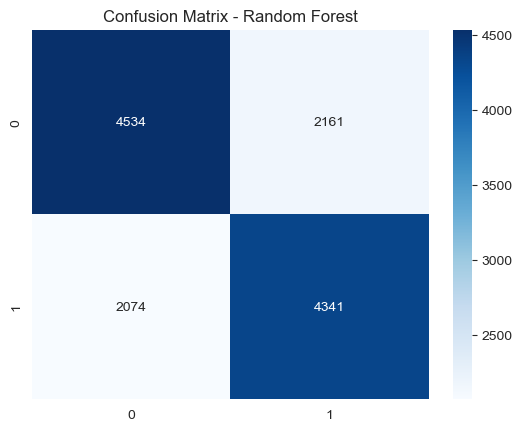

--- Training XGBoost ---
Accuracy: 0.7207
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6695
           1       0.74      0.67      0.70      6415

    accuracy                           0.72     13110
   macro avg       0.72      0.72      0.72     13110
weighted avg       0.72      0.72      0.72     13110



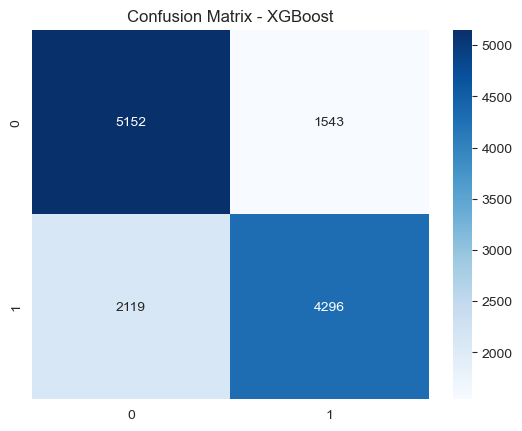

In [164]:
# --- Initialize and Train Models ---
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    # The 'use_label_encoder' parameter has been removed from the line below
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')
}

for name, model in models.items():
    print(f"--- Training {name} ---")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # --- Evaluation ---
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    
    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

#  Project Summary & Key Findings

This project aimed to predict the presence of cardiovascular disease based on a patient's health metrics and lifestyle choices. The workflow involved a comprehensive process of data cleaning, where illogical values in blood pressure readings were corrected and duplicates were removed. Feature engineering was then performed to create more insightful variables, such as converting age from days to years and calculating the Body Mass Index (BMI).

Two different classification models, Random Forest and XGBoost, were trained and evaluated on the cleaned dataset. Both models showed a clear ability to identify patterns related to cardiovascular disease. The XGBoost model emerged as the top performer, achieving an accuracy of approximately 72%.

A key takeaway from the analysis is that while the model performance is promising, the true value lies in the rigorous preprocessing applied to make the raw data usable and reliable for machine learning tasks.